# Tensorflow 自带数据集
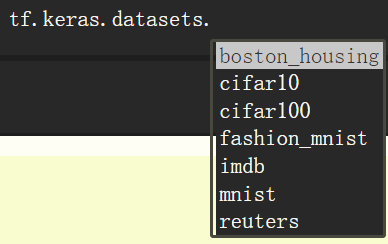

1. MNIST
2. CIFAR10
3. 

In [1]:
import tensorflow as tf
from tensorflow import keras

(x,y),(t_x,t_y) = keras.datasets.mnist.load_data()


In [2]:
x.shape
y.shape
type(x)

numpy.ndarray

In [3]:
y_onehot = tf.one_hot(y,depth=10)
y_onehot[:2]

<tf.Tensor: id=8, shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:

(x,y),(t_x,t_y) = keras.datasets.cifar10.load_data()

### 数据集读取入tensorflow的对象中
---
**以往的做法**

1. 使用placeholder，然后使用feed_dict将数据feed进placeholder进行使用；灵活，可分batch，也可整个放入；但是效率低下
2. QueueRunner，将磁盘中的数据分批次读入模型中使用；改进了效率，但不够直观，不方便调试，操作复杂
3. ***tf.data.Dataset模块，tf1.x引入的新方法；方便，支持多线程，效率有提高***

> TFRecord:将磁盘碎片化的图片等数据集转换为一个二进制的TFReord文件，加速文件的导入

***tf.data.Dataset使用说明***

>A Dataset can be used to represent an input pipeline as a collection of elements and a "logical plan" of transformations that act on those elements.(Dataset是一个输入过程的流水线以及其中的操作集合)

###### Methods

- __iter__ : 创建一个枚举dataset中元素的迭代器
- batch(batch_size,drop_remainder=False) : 第二个参数表示如果batch_size不能整除，多出的部分是否保留
- concatenate(self,other_dataset) : 合并两个Dataset
- filter(self,func) : 选择指定的data
- from_generator 
   - python Generator > 生成器的作用，如果有一个数据集数据量很大，我们通常无法将其整个用一个list存入内存中，使用生成器使得其不用整个放入内存，当需要迭代使用时再依次放入内存
   
- from_tensor_slices(tensor)
   - from_tensor_slices用于创建dataset,其元素是给定张量的切片的元素
  - 嵌套元素from_tensor_slices必须在第0级具有相同的维度(from_tensors不需要)
  - 注意：当data非tf.tensor类型时，会先转化为tensor，这可能需要很大的代价
```
@staticmethod
from_tensor_slices(tensors)

```
> Creates a Dataset whose elements are slices of the given tensors.



1.构建数据集 tf.data.Dataset.from_tensor_slices()


In [5]:
x.shape  # 50000,32,32,3
# tf.data.Dataset.from_tensor_slices(x_t)

(50000, 32, 32, 3)

In [6]:
y.shape # 50000,1
y = y.reshape(-1)
y.tolist()
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
# 返回 tf.dataset对象  支持迭代的集合对象
y_one_hot = tf.one_hot(y,depth=10)
db = tf.data.Dataset.from_tensor_slices((x,y_one_hot))

In [8]:
# shuffle

db = db.shuffle(buffer_size=100)

In [9]:
# map  和标准map的类似
def func(i_x,i_y):
    return i_x,i_y

db.map(func)

<MapDataset shapes: ((32, 32, 3), (10,)), types: (tf.uint8, tf.float32)>

In [12]:
# batch
batch_size = 10
db.batch(batch_size)

db_iter = iter(db)
# len(db_iter)

db_4 = db.repeat(4)
# for i in db_iter:
    
len(list(iter(db)))


50000

[Tensorflow datasets.shuffle repeat batch方法](https://blog.csdn.net/qq_16234613/article/details/81703228)



In [11]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.data import Dataset

In [42]:
(x,y),(x_t,y_t)  = datasets.fashion_mnist.load_data()

In [43]:
x.shape

(60000, 28, 28)

In [10]:
y.shape

(60000,)

In [63]:
x = x[:300,...]
y = y[:300,...]
x.shape

(300, 28, 28)

In [85]:
data = Dataset.from_tensor_slices((x,y))  # 构成一个(x,y)的tuple

In [86]:
data = data.shuffle(2)
# data = data.batch(20)
# data = data.repeat(3)

##### shuffle中batch_size的作用
---
> 参数buffer_size值越大，意味着数据混乱程度也越大。具体原理如下所示。
假设buffer_size = 9，也即先从 dataset 数据集中取出 9 个数据“拖”到 buffer 区域中，后续训练数据的每一个样本将从 buffer 区域中获取。

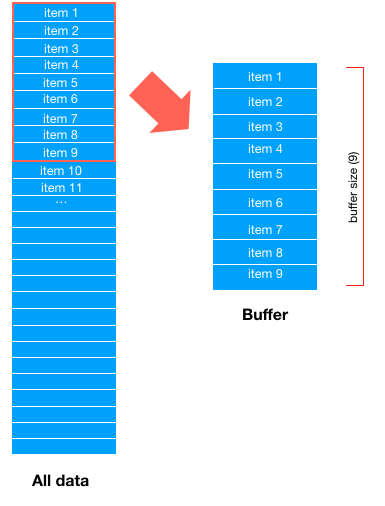

In [88]:
for index,i in enumerate(iter(data)):
#     print(index,i[1])
    pass


#### tf.assign_sub 函数解释
---

如果遇到一个常量需要更新值（如 w = w - dw）时，不能直接使用 w = w - dw来执行更新，因为这种更新是将变量名w重新赋予一个新对象，此时的w和之前的w不是同一个对象